## 1- Load the dataset & the libraries

The dataset we'll use is a list of opened complain cases with 268,363 records that contains complaint text (**text**), a message identifier (**complaint_id**) and a verified correct complaint department (**product_group**).

In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed()
import nltk
nltk.download('wordnet')
import re
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmetcakmak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


credit_reporting    81231
debt_collection     61459
mortgage            40280
loan                31035
credit_card         29553
bank_service        20071
money_transfers      4734
Name: product_group, dtype: int64


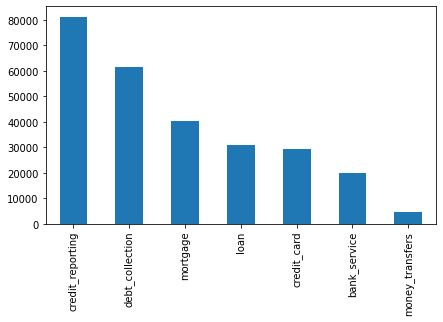

In [2]:
data = pd.read_csv("case_study_data.csv")
print(data['product_group'].value_counts())
plt.figure(figsize=(7,4))
data.product_group.value_counts().plot(kind='bar');



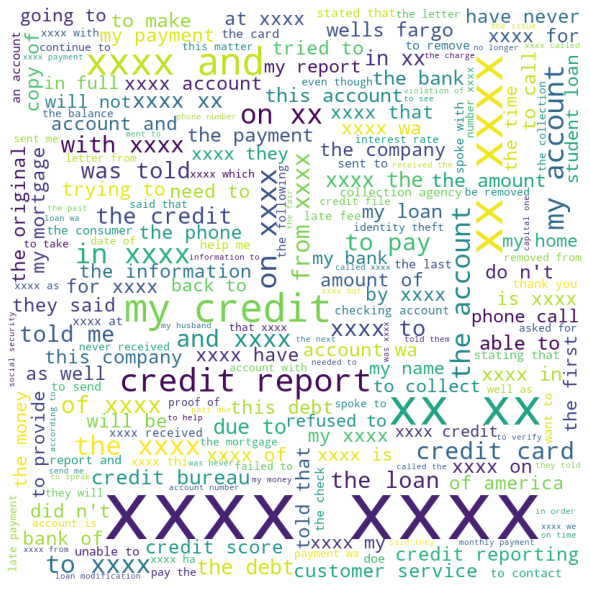

In [5]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  

df = data
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## 2- Preprocess the dataset

In [6]:
stemmer = SnowballStemmer("english")

def lemm_stemm(x_text):
    tmp = WordNetLemmatizer().lemmatize(x_text, pos='v')
    return stemmer.stem(tmp)

# Tokenize and lemmatize
def preprocess(x_text):
    result=''
    for token in gensim.utils.simple_preprocess(x_text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            # Perform lemm_stemm on the token, then append to the result
            result+=' '+lemm_stemm(token) #.append(lemm_stemm(token))
    return result


In [7]:
print( stemmer.stem(WordNetLemmatizer().lemmatize('harder',pos='a')))

hard


In [10]:
# Preprocess all the complains, saving the list of results as 'processed_data'

processed_data = data['text'].map(preprocess)

In [ ]:
# Save the preprocessed data

#cdata.to_csv('processed_data.csv')

In [11]:
# Instead of lemmatize preprocessed  data, we read it and put it back to the data file. 

cdata = pd.read_csv("processed_data.csv",header = None)
cdatas=cdata[:][1].str.replace(r'[^a-zA-Z\s]+|x{2,}', '')

In [13]:
cdatas.head()

0     check  debit check account check wasn cash   ...
1     open bank west account account come promot pr...
2     well fargo open busi account author earli lie...
3     hold place save account  institut say make  t...
4     dear cfpb need send major concern complaint f...
Name: 1, dtype: object

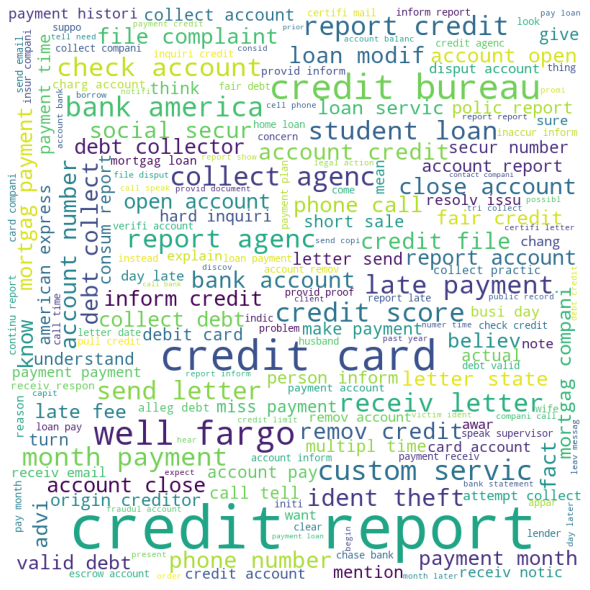

In [15]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  

df = cdatas
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [16]:
print(cdatas.isnull())

0         False
1         False
2         False
3         False
4         False
          ...  
268358    False
268359    False
268360    False
268361    False
268362    False
Name: 1, Length: 268363, dtype: bool


In [17]:
# Some words have lost after lemmatize, therefore we put an arbitrary word instead of them. 

I=cdatas.isnull()
cdatas[I]='money'
data.text=cdatas

In [18]:
[138799, 154142, 160374, 162349, 170333, 189872]

[138799, 154142, 160374, 162349, 170333, 189872]

In [19]:
cdatas[138799]

'money'

In [20]:
print(len(cdatas))

268363


In [21]:
num_voc = set()
cdatas.str.lower().str.split().apply(num_voc.update)
print (len(num_voc))

58291


## 3- Naive Bayes Classifier

After the preprocessing, we are ready to apply to predict the **product_group** categories. We will begin with Naive-Bayes method. It will perform a good baseline for our classification task. The scikit-learn has several type of classification tools, one of the most conveniet one in this task is the multinomial variant (sklearn.naive_bayes.MultinomialNB). This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. 


In [24]:
X = data.text
y = data.product_group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [25]:
# Get all distinct `product_group`
dist_product_group = data.product_group.unique()
dist_product_group

array(['bank_service', 'credit_card', 'credit_reporting',
       'debt_collection', 'loan', 'money_transfers', 'mortgage'],
      dtype=object)

In [26]:
print('# of training samples:{}'.format(len(X_train)))
print('# of training samples:{}'.format(len(X_test)))

# of training samples:214690
# of training samples:53673


In [27]:
print(len(X_train[0]))

163


In order to make the classifier, we will use the Naive Bayes pipeline in scikit-learn from the flow of CountVectorizer + TfidfTransformer + MultinomialNB. It will perform as a compound classifier. 



In [28]:
from sklearn.metrics import classification_report
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=dist_product_group))

accuracy 0.78244182363572
                  precision    recall  f1-score   support

    bank_service       0.81      0.56      0.66      3952
     credit_card       0.75      0.67      0.71      5955
credit_reporting       0.75      0.90      0.81     16184
 debt_collection       0.78      0.78      0.78     12237
            loan       0.85      0.65      0.74      6213
 money_transfers       0.99      0.15      0.27       986
        mortgage       0.84      0.93      0.88      8146

        accuracy                           0.78     53673
       macro avg       0.82      0.66      0.69     53673
    weighted avg       0.79      0.78      0.77     53673



## 4- Support Vector Classifier

Support Vector Machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

Linear Support Vector Classification (LinearSVC) is similar to SVC with parameter kernelis linear, but implemented in terms of **liblinear** rather than **libsvm**, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [29]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=4, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=dist_product_group))

accuracy 0.8092523242598699
                  precision    recall  f1-score   support

    bank_service       0.75      0.74      0.75      3952
     credit_card       0.78      0.75      0.76      5955
credit_reporting       0.80      0.86      0.83     16184
 debt_collection       0.79      0.81      0.80     12237
            loan       0.84      0.69      0.75      6213
 money_transfers       0.92      0.43      0.59       986
        mortgage       0.88      0.93      0.90      8146

        accuracy                           0.81     53673
       macro avg       0.82      0.74      0.77     53673
    weighted avg       0.81      0.81      0.81     53673



## 5- Coclusion:

We achieve a higher accuracy score by Support Vector Classification around ~81% which is a decent improvement over Naive Bayes. NB had ~77% accuracy. In the second coding file, I will try a Deep Learning pipeline to improve my performance. 